# **Exploratory Data Analysis (Retail)**

In this we will analyse the data of a retail store and suggest solutions to enhance the profit

# **Name: OWAIS C H**

**Import Libraries and Reading the Data**

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import io
from google.colab import files

uploaded=files.upload()

retail_data=pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv']))

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [ ]:
retail_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
retail_data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [ ]:
retail_data.shape

(9994, 13)

In [ ]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**Visualization for checking whether any null values are present or not**

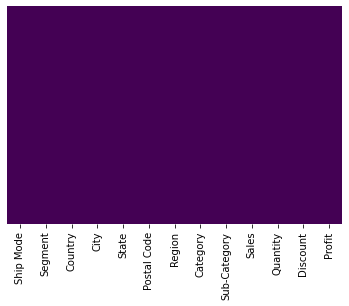

In [ ]:
sns.heatmap(retail_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
retail_data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:
for i in retail_data.columns[0:3]:
  print('Unique items for '+str(i),retail_data[i].unique())

Unique items for Ship Mode ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Unique items for Segment ['Consumer' 'Corporate' 'Home Office']
Unique items for Country ['United States']


In [ ]:
retail_data.describe().drop('Postal Code',axis=1)

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


**Total number of Sales, Quantity, Discount and Profit** 

In [ ]:
Total=pd.DataFrame(retail_data[['Sales','Quantity','Discount','Profit']].sum())
Total.rename(columns={0:'Total'},inplace=True)
Total

,Total
Sales,2.297201e+06
Quantity,3.787300e+04
Discount,1.561090e+03
Profit,2.863970e+05


**Correlation plot**

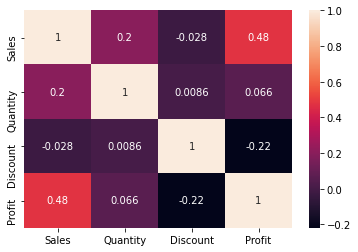

In [ ]:
retail_analysis=retail_data[['Sales','Quantity','Discount','Profit']]

correlation=retail_analysis.corr()

sns.heatmap(correlation,xticklabels=retail_analysis.columns,yticklabels=retail_analysis.columns,annot=True)
plt.show()

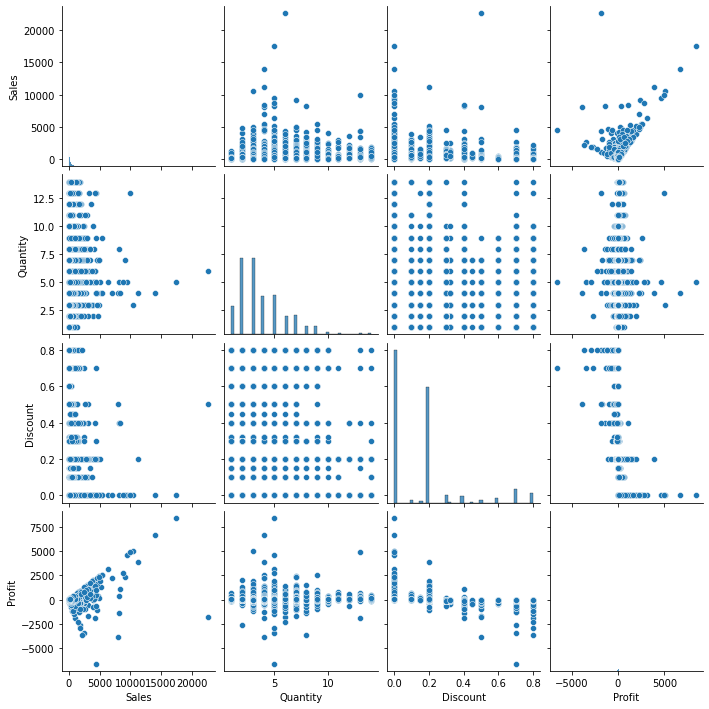

In [ ]:
sns.pairplot(retail_analysis)
plt.show()

# **Profit Based on Category**

In this case we use groupby function to group the category and sum the values of profit to see which category yeild more profit

In [ ]:
profit_category=pd.DataFrame(retail_data.groupby('Category')['Profit'].sum())
profit_category

,Profit
Category,
Furniture,18451.2728
Office Supplies,122490.8008
Technology,145454.9481


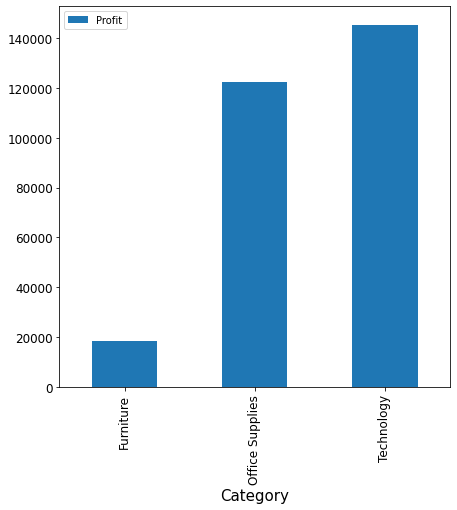

In [ ]:
profit_category.plot(kind='bar',figsize=(7,7),fontsize=12)
plt.xlabel('Category',fontsize=15)
plt.show()

**Effect of discount on profit of categories**

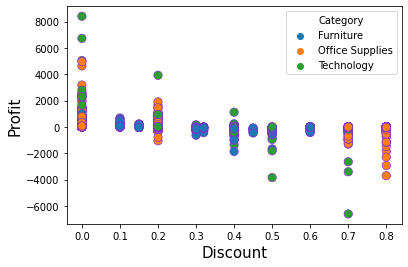

In [ ]:
sns.scatterplot(x='Discount', y='Profit', data=retail_data, hue="Category", cmap='RdBu',edgecolor=(0.5,0.2,0.8), s=70)
plt.xlabel('Discount',fontsize=15)
plt.ylabel('Profit',fontsize=15)
plt.show()


**OBSERVATIONS:**

> 
*   Maximum profit is obtained from **technology** category followed by **office supplies** category and then comes **furniture** category

*   Providing discount of large margin leads to loss in different categories and the loss increseas with increase in discount margin









# **Profit Based on Various Category and Sub-Category**

In [ ]:
profit_sub=pd.DataFrame(retail_data.groupby(['Category','Sub-Category'])['Profit'].sum())
profit_sub.head()

Profit
Category        Sub-Category            
Furniture       Bookcases     -3472.5560
                Chairs        26590.1663
                Furnishings   13059.1436
                Tables       -17725.4811
Office Supplies Appliances    18138.0054

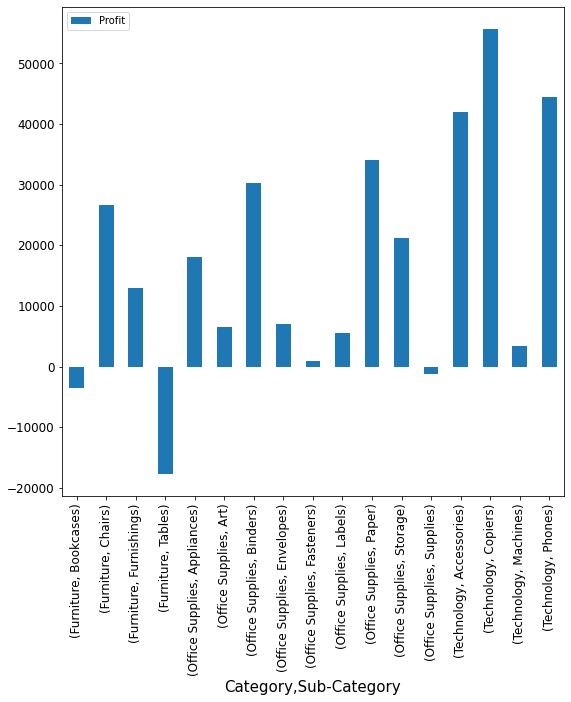

In [ ]:
profit_sub.plot(kind='bar',figsize=(9,9),fontsize=12)
plt.xlabel('Category,Sub-Category',fontsize=15)
plt.show()


**Bar plot showing discount and profit for various categories and their subcategories**

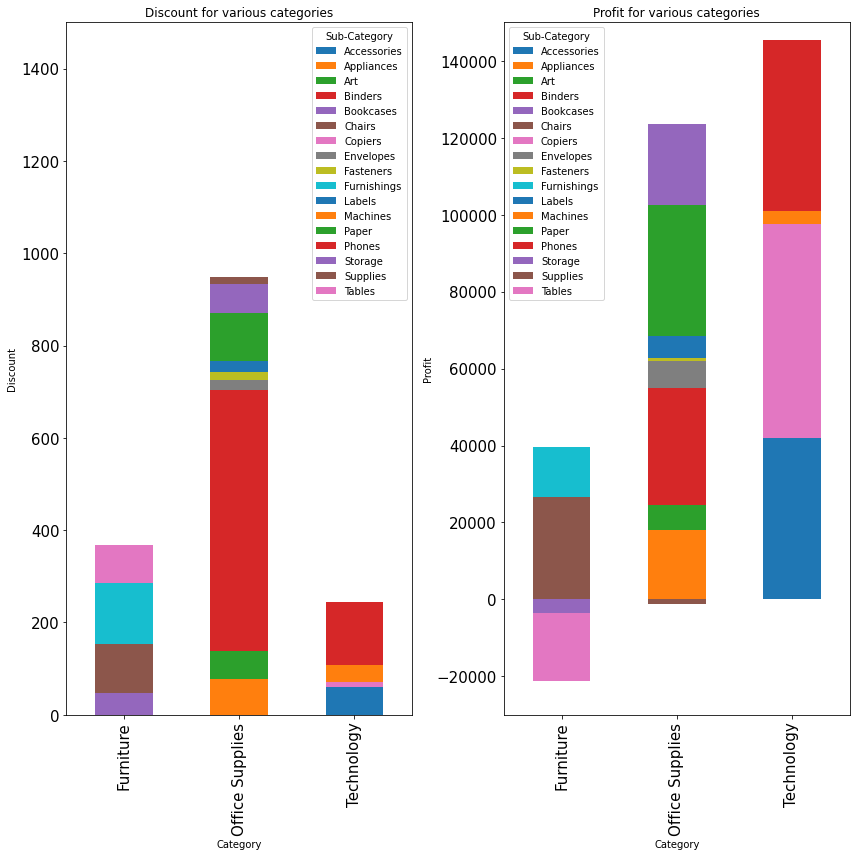

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df10 = (retail_data.groupby(['Category','Sub-Category'])['Discount'].sum().unstack().fillna(0),retail_data.groupby(['Category','Sub-Category'])['Profit'].sum().unstack().fillna(0))
y_limit=[[0,1500],[-30000,150000]]
title=['Discount for various categories','Profit for various categories']
ylabel=['Discount','Profit']
fig,axes = plt.subplots(1,2)
i=0
for ax,q in zip(axes.ravel(),['first','last']):
    tmp_df = df10[i]
    tmp_df.plot(kind='bar',ax=ax,stacked=True,figsize=(12,12),title=title[i],ylabel=ylabel[i],ylim=y_limit[i],fontsize=15)  
    i+=1

plt.tight_layout()

**OBSERVATIONS:**

> 
*  The top three items which obtained maximum profit are **Copiers, Accessories and Phones** which come under **Technology** category
*  The items which are in loss are **Tables, Bookcases** where both come under **Furniture** category and **Supplies** which belongs to **Office Supplies**




# **Sales based on category**

In [ ]:
Sales_category=pd.DataFrame(retail_data.groupby(['Category'])['Sales'].sum())
Sales_category

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


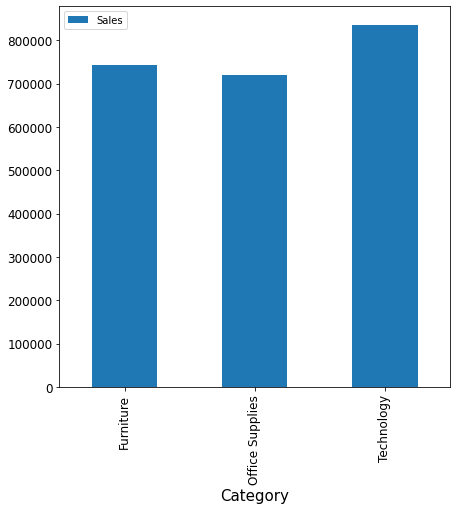

In [ ]:
Sales_category.plot(kind='bar',figsize=(7,7),fontsize=12)
plt.xlabel('Category',fontsize=15)
plt.show()

**Bar plot showing total sales and total profit for each category**

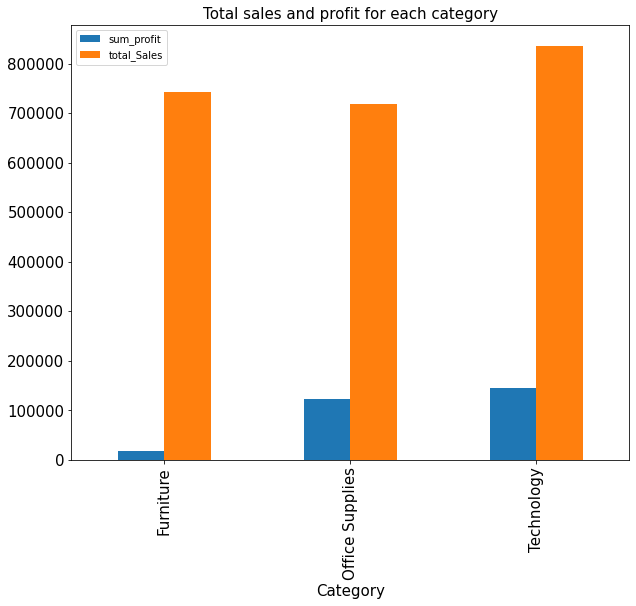

In [ ]:
retail_data.groupby(['Category']).agg(sum_profit=('Profit',np.sum),total_Sales=('Sales',np.sum)).plot(kind='bar',figsize=(10,8),fontsize=15)
plt.xlabel('Category',fontsize=15)
plt.title('Total sales and profit for each category',fontsize=15)
plt.show()

**OBSERVATIONS:**

> 
*   Maximum items are sold from **technology** category followed by **furniture** category and then comes **office supplies** category

# **Sales based on various categories and sub-categories**

In [ ]:
Sales_sub=pd.DataFrame(retail_data.groupby(['Category','Sub-Category'])['Sales'].sum())
Sales_sub.head()

Sales
Category        Sub-Category             
Furniture       Bookcases     114879.9963
                Chairs        328449.1030
                Furnishings    91705.1640
                Tables        206965.5320
Office Supplies Appliances    107532.1610

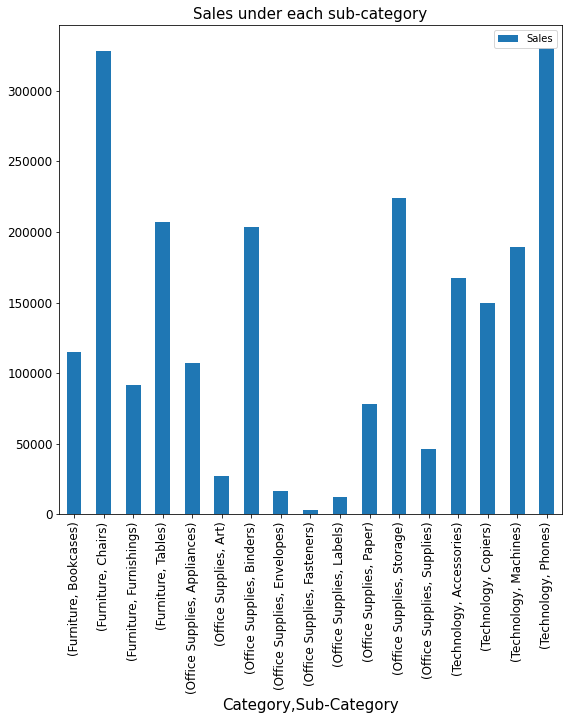

In [ ]:
Sales_sub.plot(kind='bar',figsize=(9,9),fontsize=12)
plt.xlabel('Category,Sub-Category',fontsize=15)
plt.title('Sales under each sub-category',fontsize=15)
plt.show()

**OBSERVATIONS:**

> 
*  The top three items which have maximum sales are **Phones (Technology), Chairs(Furniture) and Storage (Office Supplies)**
*  The items with lowest sales are **Fastners, Labels, Envelopes** and **Art**. All of them belong to **Office Supplies Category**

# **Profit based on state**

In [ ]:
profit_state=pd.DataFrame(retail_data.groupby(['State'])['Profit'].sum())
profit_state.head()

,Profit
State,
Alabama,5786.8253
Arizona,-3427.9246
Arkansas,4008.6871
California,76381.3871
Colorado,-6527.8579


**Bar plot showing total profit from each state**

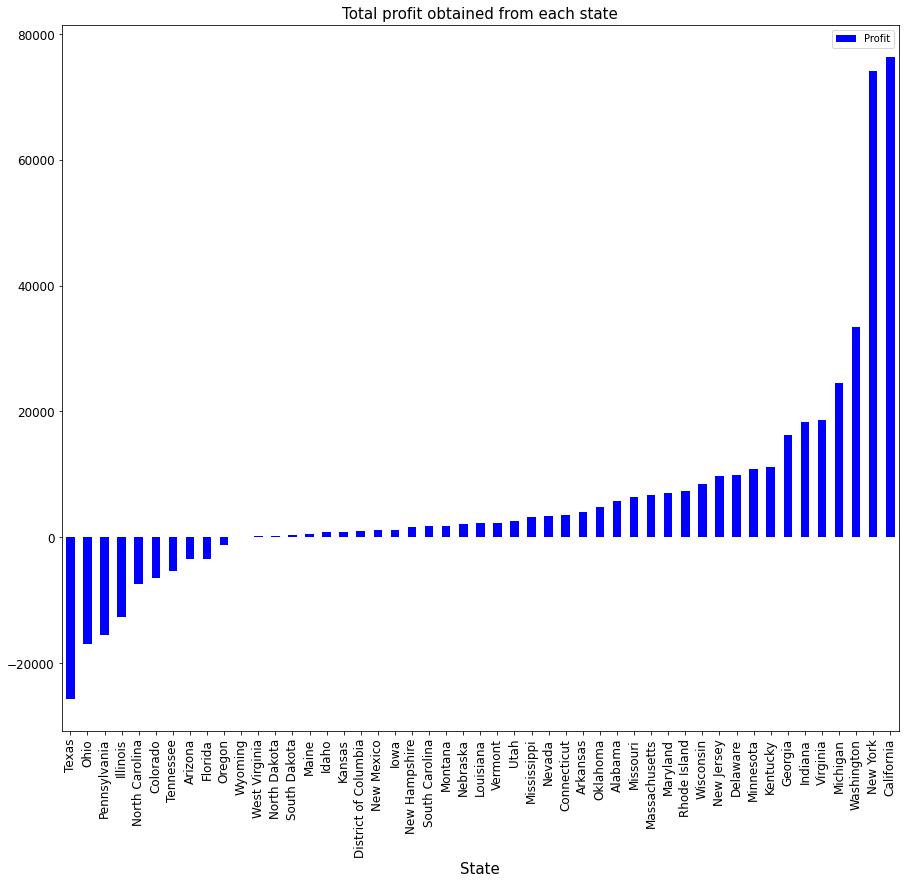

In [ ]:
profit_state1=profit_state.sort_values('Profit')
profit_state1.plot(kind='bar',figsize=(15,13),fontsize=12,color='blue')
plt.title('Total profit obtained from each state',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.show()

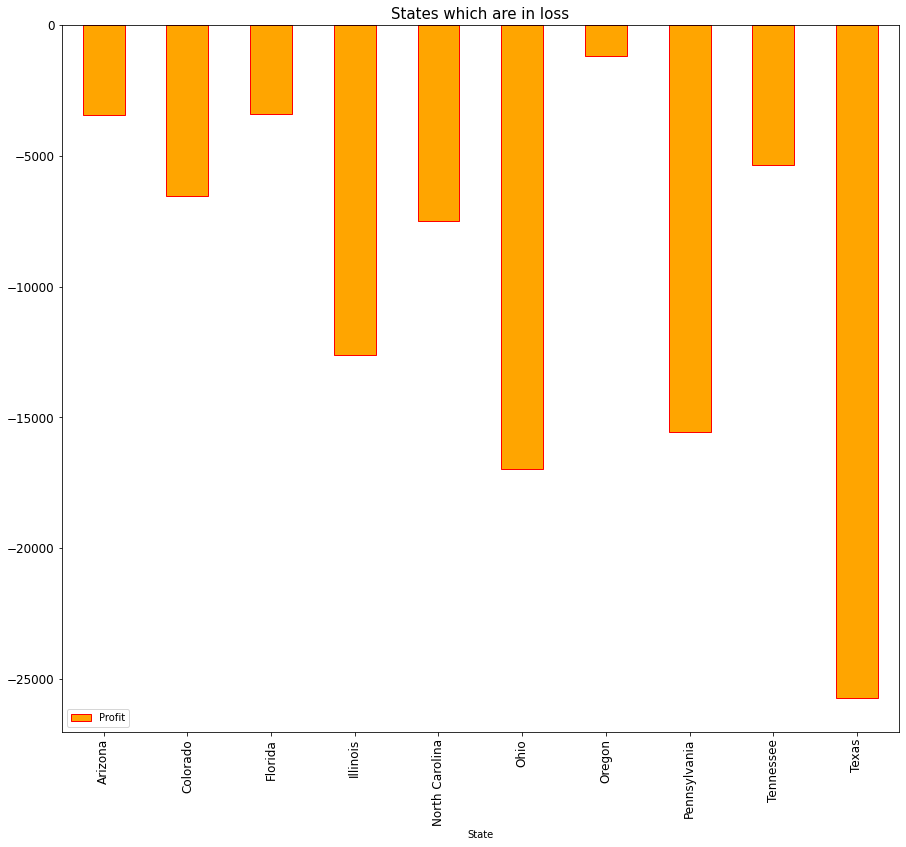

In [ ]:
profit_state[profit_state['Profit']<0].plot(kind='bar',figsize=(15,13),fontsize=12,color='orange',edgecolor='red')
plt.title('States which are in loss',fontsize=15)
plt.show()

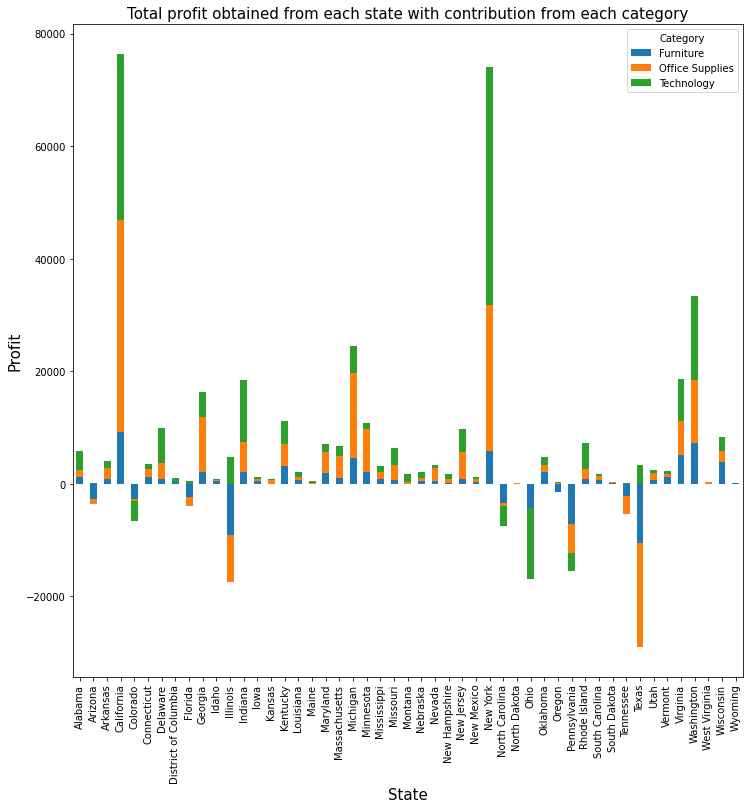

In [ ]:
df6=retail_data.groupby(['State','Category'])['Profit'].sum().unstack().fillna(0)
df6.plot(kind='bar',stacked=True,figsize=(12,12))
plt.xlabel('State',fontsize=15)
plt.ylabel('Profit',fontsize=15)
plt.title('Total profit obtained from each state with contribution from each category',fontsize=15)
plt.show()

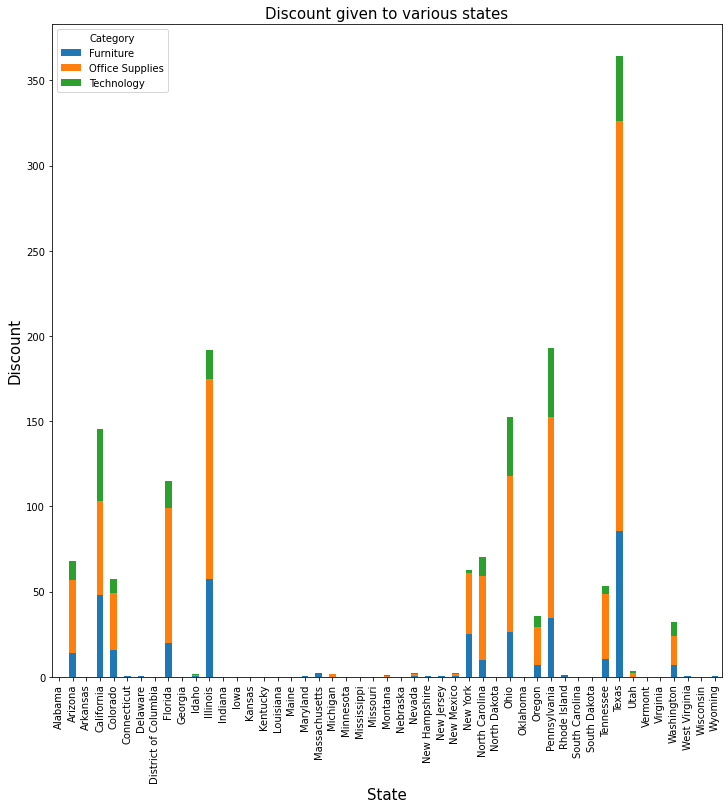

In [ ]:
df1=retail_data.groupby(['State','Category'])['Discount'].sum().unstack().fillna(0)
df1.plot(kind='bar',stacked=True,figsize=(12,12))
plt.xlabel('State',fontsize=15)
plt.ylabel('Discount',fontsize=15)
plt.title('Discount given to various states',fontsize=15)
plt.show()

**OBSERVATION:**

> 
*   Maximum profit is obtained from **California** State
*   Minimum Profit is obtained from **Texas** State
*   The States which are in loss are: **Texas, Ohio, Pennsylvania, Illinois, North Carolina, Colarado, Tennessee, Arizona, Florida, Oregon**


*   In the states which are in loss the majority of the loss is mainly because of **Office Supplies** and **Furniture** followed by **Technology**
*   In general, states with higher discount has higher loss


# **Sales based on state**

In [ ]:
sales_state=pd.DataFrame(retail_data.groupby(['State'])['Sales'].sum())
sales_state.head()

,Sales
State,
Alabama,19510.6400
Arizona,35282.0010
Arkansas,11678.1300
California,457687.6315
Colorado,32108.1180


**Bar plot showing total sales from each state**

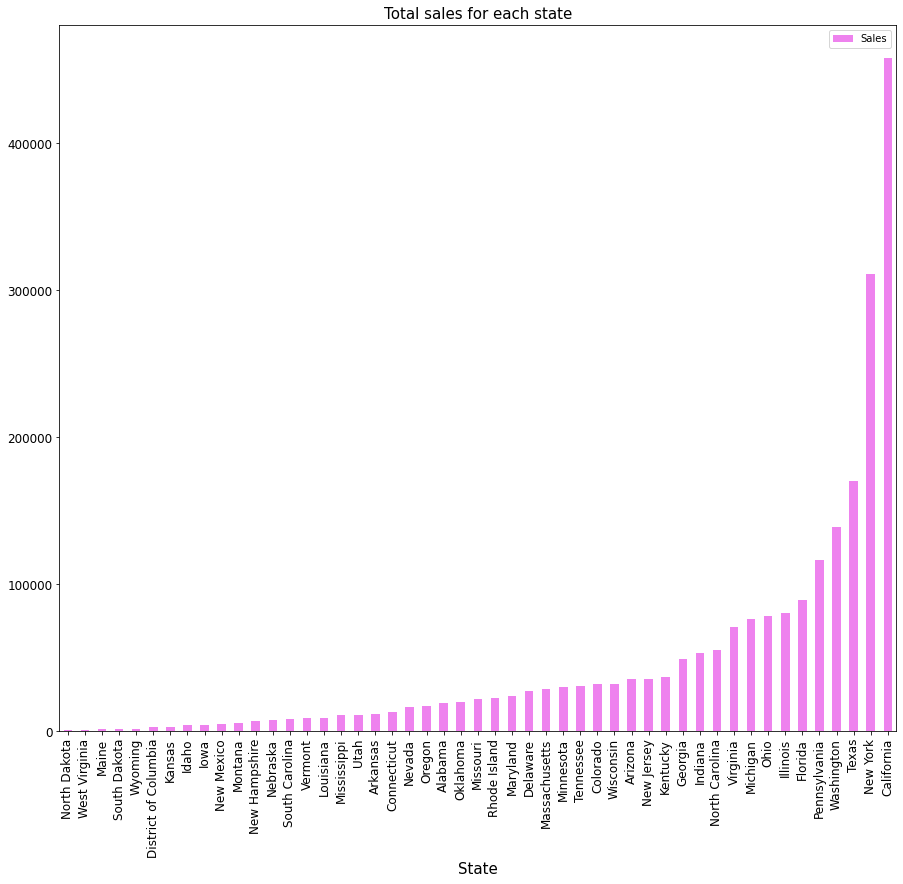

In [ ]:
sales_state1=sales_state.sort_values(by='Sales')
sales_state1.plot(kind='bar',figsize=(15,13),fontsize=12,color='violet')
plt.title('Total sales for each state',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.show()

**OBSERVATION:**


>
*   In the first top 10 state with maximum sales around 50% of them are at loss  
*   The maximum sales are recorded at California and Newyork which belongs to profitable states





**Bar plot showing total sales and total profit for each state**

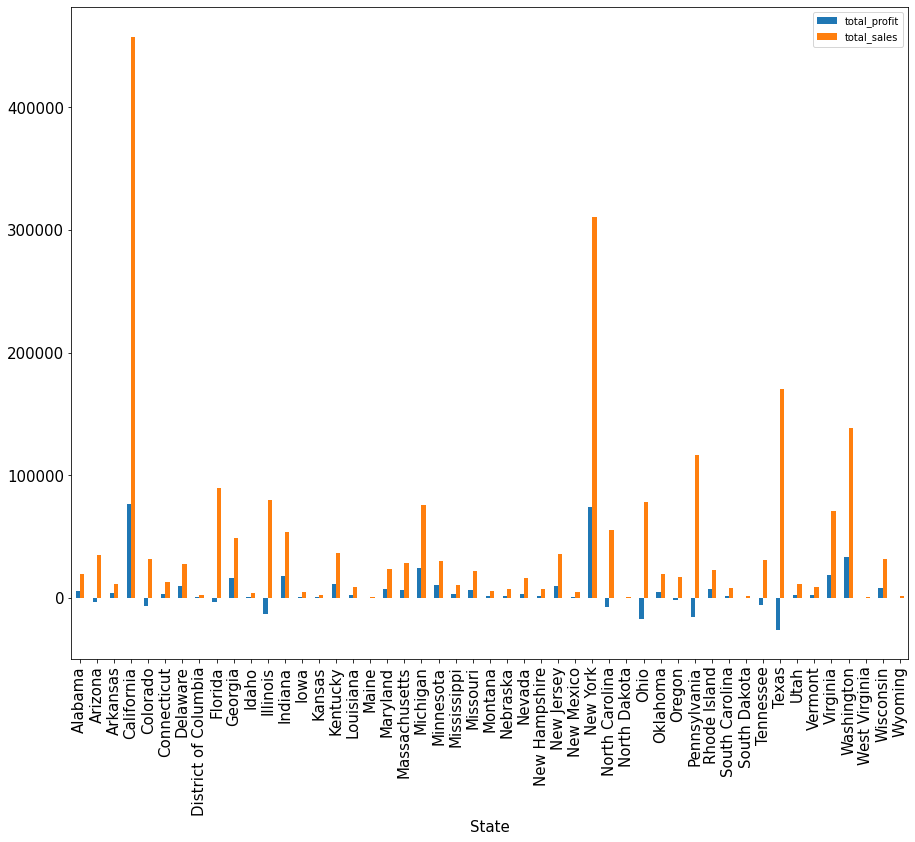

In [ ]:
retail_data.groupby(['State']).agg(total_profit=('Profit',np.sum),total_sales=('Sales',np.sum)).plot(kind='bar',figsize=(15,12),fontsize=15)
plt.xlabel('State',fontsize=15)
plt.show()

# **Profit based on city**

In [ ]:
max_profit_city=pd.DataFrame(retail_data.groupby(['City'])['Profit'].sum())
max_profit_city.head()

,Profit
City,
Aberdeen,6.6300
Abilene,-3.7584
Akron,-186.6356
Albuquerque,634.0881
Alexandria,318.6183


**Bar plot showing the top five cities with maximum profit**

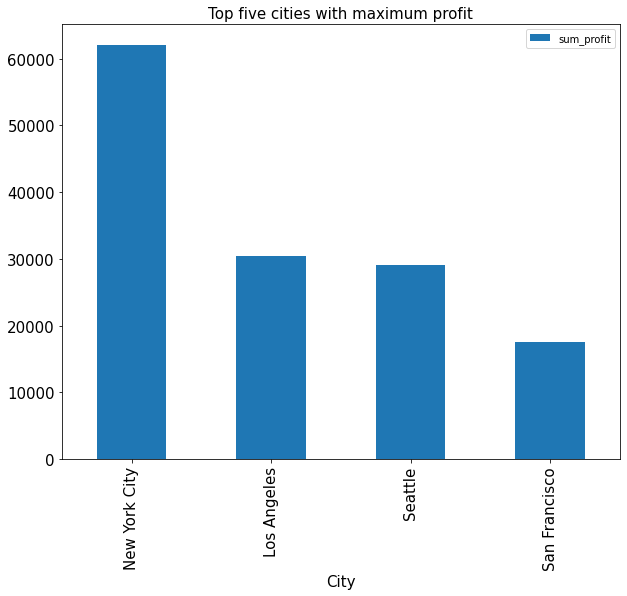

In [ ]:
retail_data.groupby(['City']).agg(sum_profit=('Profit',np.sum)).sort_values(['sum_profit'],ascending='True')[-1:-5:-1].plot(kind='bar',figsize=(10,8),fontsize=15)
plt.xlabel('City',fontsize=15)
plt.title('Top five cities with maximum profit',fontsize=15)
plt.show()

**Bar plot showing the loss of five cities with minimum profit**

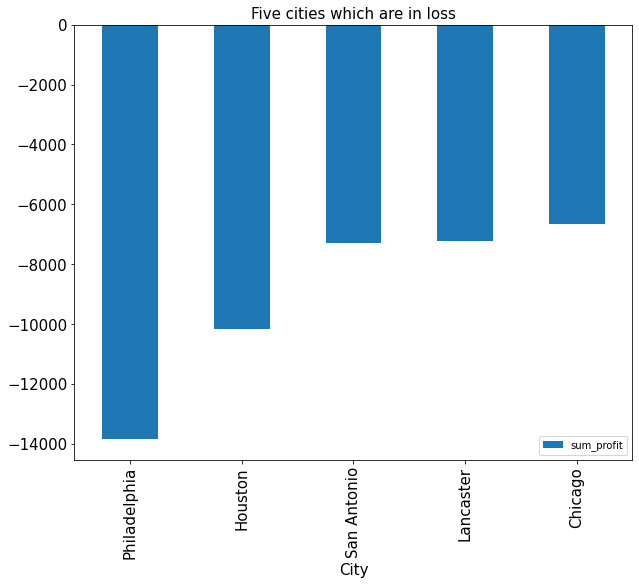

In [ ]:
retail_data.groupby(['City']).agg(sum_profit=('Profit',np.sum)).sort_values(['sum_profit'],ascending='True')[0:5].plot(kind='bar',figsize=(10,8),fontsize=15)
plt.xlabel('City',fontsize=15)
plt.title('Five cities which are in loss',fontsize=15)
plt.show()

# **Sales based on city**

In [ ]:
max_sales_city=pd.DataFrame(retail_data.groupby(['City'])['Sales'].sum())
max_sales_city.head()

,Sales
City,
Aberdeen,25.500
Abilene,1.392
Akron,2729.986
Albuquerque,2220.160
Alexandria,5519.570


**Bar plot showing the top five cities with maximum sales**

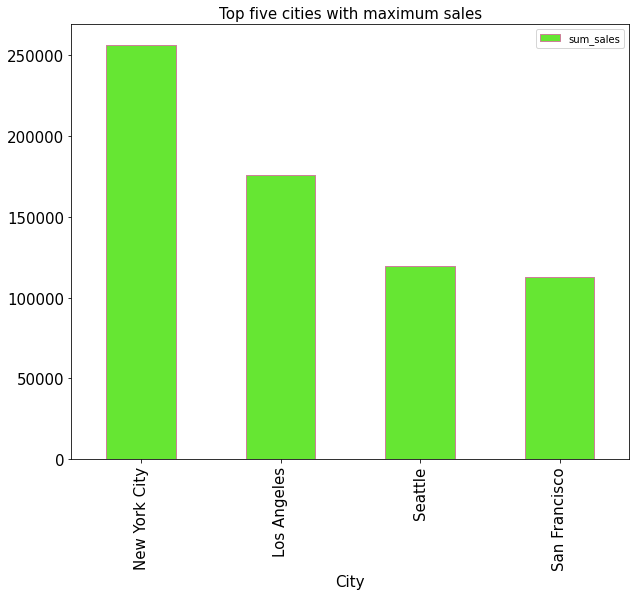

In [ ]:
retail_data.groupby(['City']).agg(sum_sales=('Sales',np.sum)).sort_values(['sum_sales'],ascending='True')[-1:-5:-1].plot(kind='bar',figsize=(10,8),fontsize=15,color=(0.4,0.9,0.2),edgecolor=(0.8,0.5,0.6))
plt.xlabel('City',fontsize=15)
plt.title('Top five cities with maximum sales',fontsize=15)
plt.show()

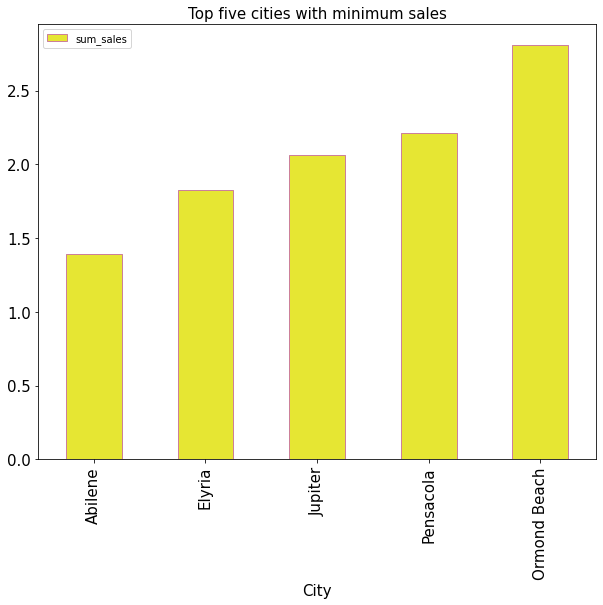

In [ ]:
retail_data.groupby(['City']).agg(sum_sales=('Sales',np.sum)).sort_values(['sum_sales'],ascending='True')[0:5:1].plot(kind='bar',figsize=(10,8),fontsize=15,color=(0.9,0.9,0.2),edgecolor=(0.8,0.5,0.6))
plt.xlabel('City',fontsize=15)
plt.title('Top five cities with minimum sales',fontsize=15)
plt.show()

**Bar plot showing the top five cities with maximum sales and profit**

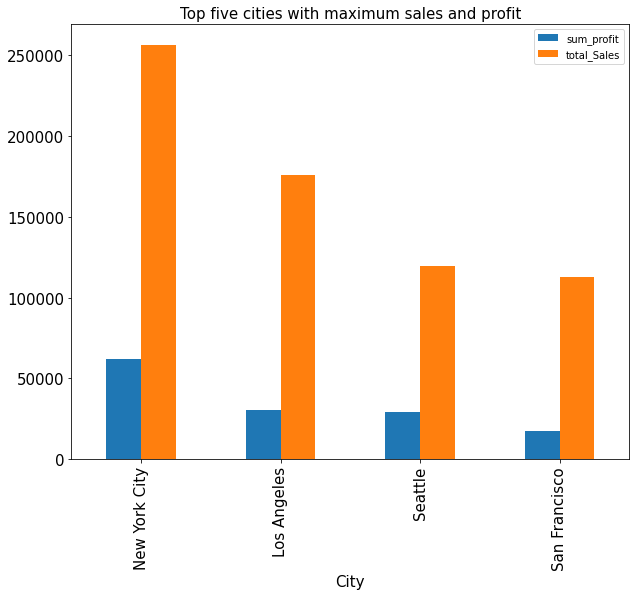

In [ ]:
retail_data.groupby(['City']).agg(sum_profit=('Profit',np.sum),total_Sales=('Sales',np.sum)).sort_values(['sum_profit','total_Sales',],ascending='True')[-1:-5:-1].plot(kind='bar',figsize=(10,8),fontsize=15)
plt.xlabel('City',fontsize=15)
plt.title('Top five cities with maximum sales and profit',fontsize=15)
plt.show()

**Bar plot showing the sales and profit of five cities which are in loss**

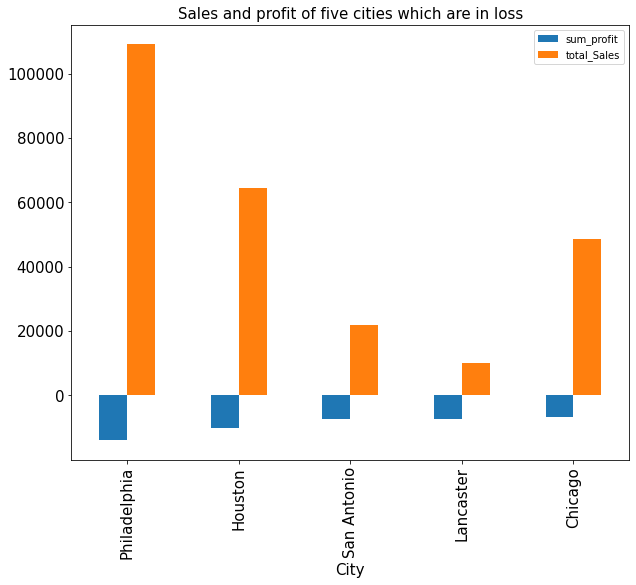

In [ ]:
retail_data.groupby(['City']).agg(sum_profit=('Profit',np.sum),total_Sales=('Sales',np.sum)).sort_values(['sum_profit','total_Sales'],ascending='True')[0:5].plot(kind='bar',figsize=(10,8),fontsize=15)
plt.xlabel('City',fontsize=15)
plt.title('Sales and profit of five cities which are in loss',fontsize=15)
plt.show()

# **Profit based on region**

In [ ]:
max_profit_region=pd.DataFrame(retail_data.groupby(['Region'])['Profit'].sum())
max_profit_region.head()

,Profit
Region,
Central,39706.3625
East,91522.7800
South,46749.4303
West,108418.4489


**Bar plot showing total profit from each region**

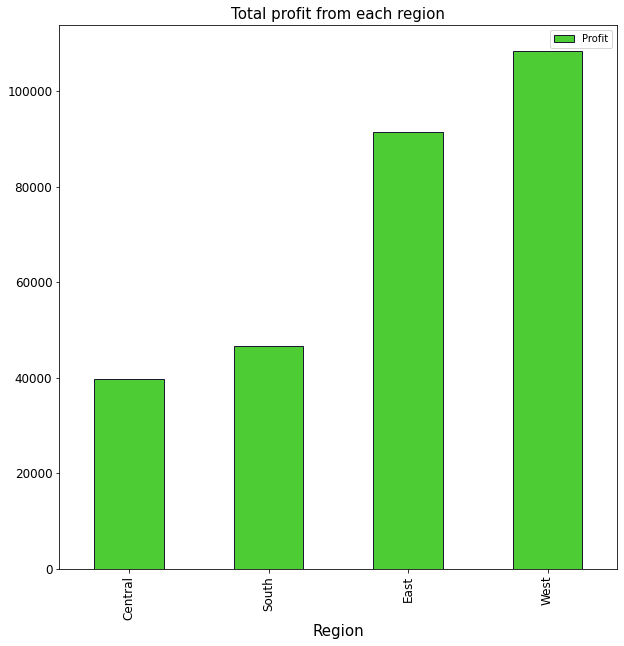

In [ ]:
profit_region=max_profit_region.sort_values(by='Profit')
profit_region.plot(kind='bar',figsize=(10,10),fontsize=12,color=(0.3,0.8,0.2),edgecolor=(0.1,0.1,0.2))
plt.title('Total profit from each region',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.show()

# **Sales based on region**

In [ ]:
max_sales_region=pd.DataFrame(retail_data.groupby(['Region'])['Sales'].sum())
max_sales_region.head()

,Sales
Region,
Central,501239.8908
East,678781.2400
South,391721.9050
West,725457.8245


**Bar plot showing total sales from each region**

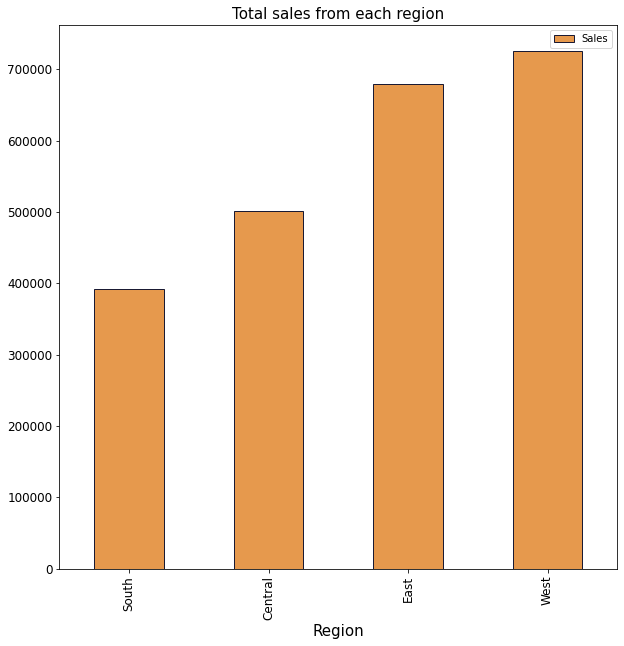

In [ ]:
sales_region=max_sales_region.sort_values(by='Sales')
sales_region.plot(kind='bar',figsize=(10,10),fontsize=12,color=(0.9,0.6,0.3),edgecolor=(0.1,0.1,0.2))
plt.title('Total sales from each region',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.show()

**OBSERVATION:**


> 

*   **West** and **East** regions has high profit as well as sales when compared to other two regions





**Sub plots showing total profit with various variables**

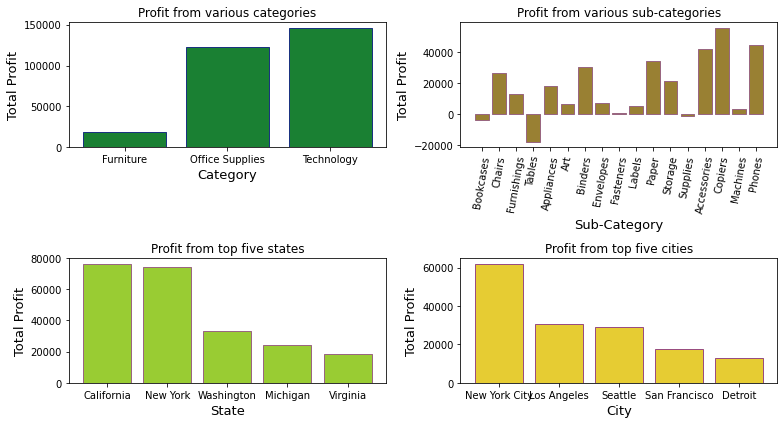

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig,((axis1,axis2),(axis3,axis4)) = plt.subplots(nrows=2, ncols=2,figsize=(11,6))

aa=pd.DataFrame(retail_data.groupby('Category')['Profit'].sum())

axis1.bar(aa.index,aa['Profit'],color=(0.1, 0.5, 0.2),edgecolor=(0.1, 0.2, 0.5))
axis1.set_ylabel('Total Profit',fontsize=13)
axis1.set_xlabel('Category',fontsize=13)
axis1.set_title('Profit from various categories')

bb=pd.DataFrame(retail_data.groupby(['Category','Sub-Category'])['Profit'].sum())

axis2.bar([i[1] for i in bb.index.values],bb['Profit'],color=(0.6, 0.5, 0.2),edgecolor=(0.6, 0.4, 0.5))
axis2.set_ylabel('Total Profit',fontsize=13)
axis2.set_xlabel('Sub-Category',fontsize=13)
axis2.set_xticklabels([i[1] for i in bb.index.values],rotation=80)
axis2.set_title('Profit from various sub-categories')

cc=retail_data.groupby(['State']).agg(sum_profit=('Profit',np.sum)).sort_values(['sum_profit'],ascending='True')[-1:-6:-1]
axis3.bar(cc.index.values,cc['sum_profit'],color=(0.6, 0.8, 0.2),edgecolor=(0.6, 0.4, 0.5))
axis3.set_ylabel('Total Profit',fontsize=13)
axis3.set_xlabel('State',fontsize=13)

axis3.set_title('Profit from top five states')

dd=retail_data.groupby(['City']).agg(sum_profit=('Profit',np.sum)).sort_values(['sum_profit'],ascending='True')[-1:-6:-1]

axis4.bar(dd.index,dd['sum_profit'],color=(0.9, 0.8, 0.2),edgecolor=(0.6, 0.3, 0.5))
axis4.set_ylabel('Total Profit',fontsize=13)
axis4.set_xlabel('City',fontsize=13)
axis4.set_title('Profit from top five cities')

fig.tight_layout()
plt.show()

**SUMMARY AND SOLUTIONS**






*   The profit and discount are found to be negatively correlated.

*   The order of total profit with respect to the category is in the order: **Technology > Office Supplies >> Furniture**. Hence special attention need to  be given to furniture category to increase the profit. At the same time we need to come up with new methodologies for increasing the profit from office supplies which has higher number of sub-categories.

*   The States which are in loss are: **Texas, Ohio, Pennsylvania, Illinois, North Carolina, Colarado, Tennessee, Arizona, Florida, Oregon**

*   New profit making methodologies should be implemented in states which faced loss.


*   In states such as **North Dakota, West Virginia, Maine etc**. which reported very low sales we need to increase the sale with more promotion and by providing 5-10% discount.



*   In general, states with higher discount has reported higher loss. Hence we need to decrease the discount range in this states with stable amount of sale. 

